# Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as scs


%matplotlib inline
plt.style.use('ggplot')
%autoreload

UsageError: Line magic function `%autoreload` not found.


# Data Set

In [2]:
data=pd.read_csv('AdSmartABdata.csv')
data.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,10/07/2020,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,07/07/2020,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,05/07/2020,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,03/07/2020,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,03/07/2020,15,Generic Smartphone,6,Chrome Mobile,0,0


In [4]:
data.shape

(8077, 9)

# PreProcessing
categorical, numerical and timestamp features

In [3]:

numerical = []
categorical = []
timestamps = []

for col in data.columns:
    if data[col].dtype in ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']:
        numerical.append(col)
    elif data[col].dtype == object:
        categorical.append(col)
    else:
        timestamps.append(col)
        
        
features = numerical+categorical+timestamps
raw = data[features]
raw.head(3)

,hour,platform_os,yes,no,auction_id,experiment,date,device_make,browser
0,8,6,0,0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,10/07/2020,Generic Smartphone,Chrome Mobile
1,10,6,0,0,000eabc5-17ce-4137-8efe-44734d914446,exposed,07/07/2020,Generic Smartphone,Chrome Mobile
2,2,6,0,1,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,05/07/2020,E5823,Chrome Mobile WebView


In [7]:
raw.dtypes

hour            int64
platform_os     int64
yes             int64
no              int64
auction_id     object
experiment     object
date           object
device_make    object
browser        object
dtype: object

In [4]:
raw.describe()

,hour,platform_os,yes,no
count,8077.000000,8077.000000,8077.000000,8077.000000
mean,11.615080,5.947134,0.070818,0.083075
std,5.734879,0.224333,0.256537,0.276013
min,0.000000,5.000000,0.000000,0.000000
25%,7.000000,6.000000,0.000000,0.000000
50%,13.000000,6.000000,0.000000,0.000000
75%,15.000000,6.000000,0.000000,0.000000
max,23.000000,7.000000,1.000000,1.000000


In [8]:
raw.shape

(8077, 9)

# null values for numerical columns

In [9]:
#Null numerical values (percentage)
null = raw[numerical].isna().sum().sort_values(ascending = False)
null_per = (null/8077) * 100
null_perc = pd.DataFrame(null_per)
null_perc

,0
no,0.0
yes,0.0
platform_os,0.0
hour,0.0


There are no null values for numerical columns 

# null values for categorical and timestamps columns

In [10]:
#Null categorical and timestamps values 
null = data[categorical + timestamps].isna().sum().sort_values(ascending = False)
null = (null/150001) * 100
null = pd.DataFrame(null)
null

,0
browser,0.0
device_make,0.0
date,0.0
experiment,0.0
auction_id,0.0


No null values for those columns as well

# Unique categorical data

In [11]:
unique_cat = raw[categorical].nunique()
print(unique_cat)

auction_id     8077
experiment        2
date              8
device_make     270
browser          15
dtype: int64


# Users who chose yes radio button

In [13]:
used_yes = raw['yes'].value_counts(ascending = False)
used_yes = pd.DataFrame(used_yes)
used_yes

,yes
0,7505
1,572


Text(0.5, 1.0, 'A barplot indicating users who chose yes on a questionnaire')

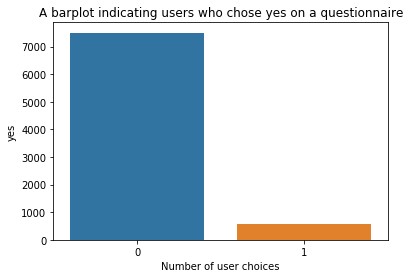

In [21]:
#plt.figure(figsize=(10,5))
sns.barplot(x = used_yes.index, y = used_yes['yes'])
plt.xlabel('Number of user choices')
plt.title('A barplot indicating users who chose yes on a questionnaire')

from the above graph we can see that few users choose YES on a BIO questionnaire

# Users who choose no button

In [24]:
used_no = raw['no'].value_counts(ascending = False)
used_no = pd.DataFrame(used_no)
used_no


,no
0,7406
1,671


Text(0.5, 1.0, 'A barplot indicating users who chose no on a questionnaire')

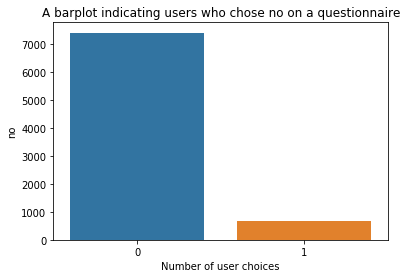

In [25]:
#plt.figure(figsize=(10,5))
sns.barplot(x = used_no.index, y = used_no['no'])
plt.xlabel('Number of user choices')
plt.title('A barplot indicating users who chose no on a questionnaire')

We can also see that the number of users who choose No are few compared to those who choose nothing

In [28]:
top_3_browsers = raw['browser'].value_counts(ascending = False).head(3)
top_3_browsers = pd.DataFrame(top_3_browsers)
top_3_browsers

,browser
Chrome Mobile,4554
Chrome Mobile WebView,1489
Samsung Internet,824


Text(0.5, 1.0, 'A barplot indicating top 3 browsers')

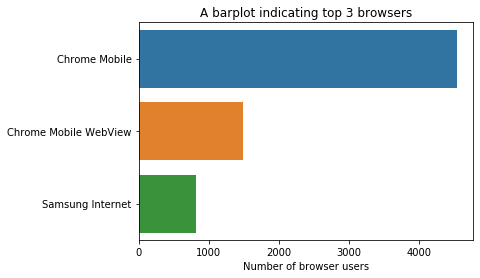

In [29]:
#plt.figure(figsize=(10,5))
sns.barplot(y = top_3_browsers.index, x = top_3_browsers['browser'])
plt.xlabel('Number of browser users')
plt.title('A barplot indicating top 3 browsers')

Most of the users uses Chrome and they browse from their mobile

In [45]:
agg_user_experiment = raw.groupby('experiment').agg({'yes':'count', 'no':'count'})
agg_user_experiment.columns = ['yes', 'no']
agg_user_experiment

,yes,no
experiment,,
control,4071,4071
exposed,4006,4006


# Hours used by users in each experiment

Text(0.5, 1.0, 'A barplot indicating hours used by users in each experiment')

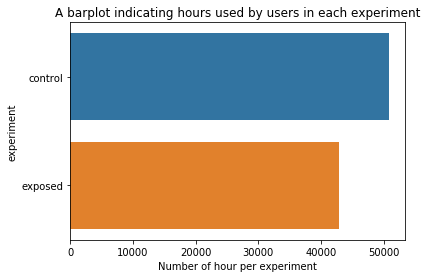

In [47]:
experiment_hour = raw.groupby('experiment').agg({'hour':'sum'})
experiment_hour.columns = ['hour']
sns.barplot(y = experiment_hour.index, x = experiment_hour['hour'])
plt.xlabel('Number of hour per experiment')
plt.title('A barplot indicating hours used by users in each experiment')

Users in the control group used many hours than those in the exposed group

# Classical A/B testing

For performing this analysis we will choose the variables which are relevant for analysis, for our case we are interested in
knowing the users who clicked yes in each group, for that reason we will choose experiment and yes columns.

Conversion rate is the rate at which users get engaged in our ads , and the lift rate is the increase in awareness that we 
want to test.
we want to comfirm that changes made will increase brand awareness atleas 2%.

In [52]:
#baseline conversion rate and  desired lift
bcr = 0.10  # baseline conversion rate
d_hat = 0.02  # difference between the groups


In [55]:
#new data set
raw_data = raw[['experiment','yes']]

In [56]:
#separating user groups
control_group = raw_data[raw_data['experiment'] == 'control']
exposed_group = raw_data[raw_data['experiment'] == 'exposed']

In [58]:
#calculating users who said yes in each group
control_converted, exposed_converted = control_group['yes'].sum(), exposed_group['yes'].sum()
control_converted, exposed_converted

(264, 308)

In [59]:
#length of each group
control_total, exposed_total = len(control_group), len(exposed_group)
control_total, exposed_total

(4071, 4006)

In [60]:
p_A, p_B = control_converted / control_total, exposed_converted / exposed_total
p_A, p_B

(0.06484893146647015, 0.07688467299051423)

In [61]:
p_B - p_A

0.012035741524044075

In [63]:
data_summary = raw_data.pivot_table(values='yes', index='experiment', aggfunc=np.sum)
data_summary['total'] = raw_data.pivot_table(values='yes', index='experiment', aggfunc=lambda x: len(x))
data_summary['rate'] = raw_data.pivot_table(values='yes', index='experiment')
data_summary

,yes,total,rate
experiment,,,
control,264,4071,0.064849
exposed,308,4006,0.076885


The above result matches our parameters that we used to set up the test, observing the conversion rate for both groups, 
you find that the new campaign resulted in an improvement of 2%.

# Comparing The Two Samples

We can compare the two groups by plotting the distribution of the control group and calculating the 
probability of getting the result from our test group. 

In [64]:
p_B * control_total

312.99750374438344

Text(0, 0.5, 'probability')

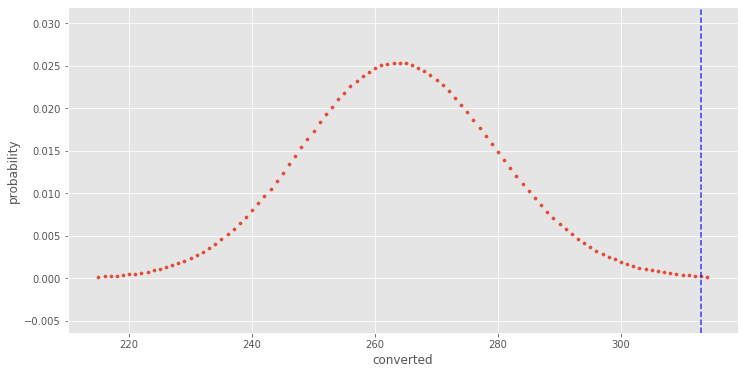

In [68]:
fig, ax = plt.subplots(figsize=(12,6))
x = np.linspace(control_converted-49, control_converted+50, 100)
y = scs.binom(control_total, p_A).pmf(x)
ax.scatter(x, y, s=10)
ax.axvline(x=p_B * control_total, c='blue', alpha=0.75, linestyle='--')
plt.xlabel('converted')
plt.ylabel('probability')

From the above graph, the probability distribution for the control group is shown in red and the result from the test group
is indicated by the blue dashed line. We can see that the probability of getting the result from the test group was very low.

In [69]:
scs.binom(control_total, p_A).pmf(116)

3.122434310409453e-26

This is a very high probability comparing to the significance level of 5%. But this can not be an evidence,
we will first find the statistical power.

# Binomial distribution

The distribution for our groups is binomial because the data is a series of Bernoulli trials, where each trial
only has two possible outcomes 

Text(0.5, 1.0, 'Binomial distributions for the control (red) and exposed (blue) groups')

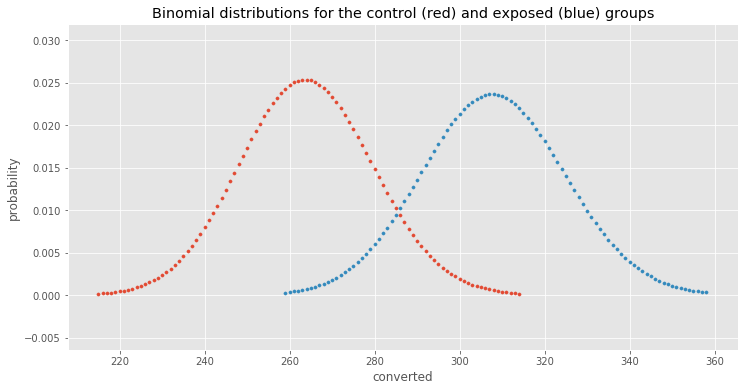

In [71]:
fig, ax = plt.subplots(figsize=(12,6))
xA = np.linspace(control_converted-49, control_converted+50, 100)
yA = scs.binom(control_total, p_A).pmf(xA)
ax.scatter(xA, yA, s=10)
xB = np.linspace(exposed_converted-49, exposed_converted+50, 100)
yB = scs.binom(exposed_total, p_B).pmf(xB)
ax.scatter(xB, yB, s=10)
plt.xlabel('converted')
plt.ylabel('probability')
plt.title('Binomial distributions for the control (red) and exposed (blue) groups')

From the above graph we can see that exposed group have many users than the control one.
it is also seen that the control group has a higher peak than the eposed one. we will focus on conversion rates rather than
the difference in peak probability. This will be done by standardizing the data and compare their probability of success.

# Bernoulli Distribution

To calculate the probability of success we will consider the bernoulli distribution of the control group X~bernoulli(p),
where p is the conversion probability of the control group. 
According to the central limit theorem,  by calculating many sample means we can approximate the true mean of the population
from which the data for the control group was taken. The distribution of the sample means will be normally distributed 
around the true mean with a standard deviation equal to the standard error(SE) of the mean.

Text(0.5, 1.0, 'plot showing the distribution of Null and alternative hypothesis')

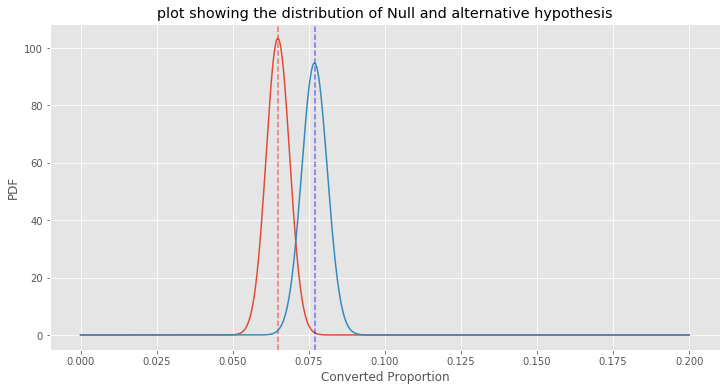

In [74]:
# standard error of the mean for both groups
SE_A = np.sqrt(p_A * (1-p_A)) / np.sqrt(control_total)
SE_B = np.sqrt(p_B * (1-p_B)) / np.sqrt(exposed_total)
# plot the null and alternative hypothesis
fig, ax = plt.subplots(figsize=(12,6))
xA = np.linspace(0, .2, 1000)
yA = scs.norm(p_A, SE_A).pdf(xA)
ax.plot(xA, yA)
ax.axvline(x=p_A, c='red', alpha=0.5, linestyle='--')

xB = np.linspace(0, .2, 1000)
yB = scs.norm(p_B, SE_B).pdf(xB)
ax.plot(xB, yB)
ax.axvline(x=p_B, c='blue', alpha=0.5, linestyle='--')

plt.xlabel('Converted Proportion')
plt.ylabel('PDF')
plt.title('plot showing the distribution of Null and alternative hypothesis')

The dashed line in the above graphs represents the mean conversion rate between the two groups, the distance between the two
lines is equal to mean difference between the control and test group d_hat(pB-pA).

# Null And Alternative Hypothesis


The null hypothesis: the position that the new ads for the exposed group would not change the conversation rate. 
the alternative hypothesis: for the case where the change increased or reduced the conversion rata


Statistical power: the probablity that a statistical test will detect a difference between the control and variant, if
there really is such a difference

In [76]:
raw_data['experiment'].value_counts()

control    4071
exposed    4006
Name: experiment, dtype: int64

In [77]:
N_control = 4071
N_exposed = 4006

In [78]:
bcr = p_A
d_hat = p_B - p_A

In [79]:
N_control, N_exposed, bcr, d_hat

(4071, 4006, 0.06484893146647015, 0.012035741524044075)

In [105]:
def pooled_prob(N_control, N_exposed, X_A, X_B):
    """Returns pooled probability for two samples"""
    return (X_A + X_B) / (N_control + N_exposed)


def pooled_SE(N_control, N_exposed, X_A, X_B):
    """Returns the pooled standard error for two samples"""
    p_hat = pooled_prob(N_control, N_exposed, X_A, X_B)
    SE = np.sqrt(p_hat * (1 - p_hat) * (1 / N_control + 1 / N_exposed))
    return SE

def confidence_interval(sample_mean=0, sample_std=1, sample_size=1,
                        sig_level=0.05):
    """Returns the confidence interval as a tuple"""
    z = z_val(sig_level)

    left = sample_mean - z * sample_std / np.sqrt(sample_size)
    right = sample_mean + z * sample_std / np.sqrt(sample_size)

    return (left, right)
def z_val(sig_level=0.05, two_tailed=True):
    """Returns the z value for a given significance level"""
    z_dist = scs.norm()
    if two_tailed:
        sig_level = sig_level/2
        area = 1 - sig_level
    else:
        area = 1 - sig_level

    z = z_dist.ppf(area)

    return z

def ab_dist(stderr, d_hat=0, group_type='control'):
    """Returns a distribution object depending on group type
    Examples:
    Parameters:
        stderr (float): pooled standard error of two independent samples
        d_hat (float): the mean difference between two independent samples
        group_type (string): 'control' and 'test' are supported
    Returns:
        dist (scipy.stats distribution object)
    """
    if group_type == 'control':
        sample_mean = 0

    elif group_type == 'test':
        sample_mean = d_hat

    # create a normal distribution which is dependent on mean and std dev
    dist = scs.norm(sample_mean, stderr)
    return dist

In [106]:
def plot_norm_dist(ax, mu, std, with_CI=False, sig_level=0.05, label=None):
    """Adds a normal distribution to the axes provided
    Example:
        plot_norm_dist(ax, 0, 1)  # plots a standard normal distribution
    Parameters:
        ax (matplotlib axes)
        mu (float): mean of the normal distribution
        std (float): standard deviation of the normal distribution
    Returns:
        None: the function adds a plot to the axes object provided
    """
    x = np.linspace(mu - 12 * std, mu + 12 * std, 1000)
    y = scs.norm(mu, std).pdf(x)
    ax.plot(x, y, label=label)

    if with_CI:
        plot_CI(ax, mu, std, sig_level=sig_level)

def plot_CI(ax, mu, s, sig_level=0.05, color='grey'):
    """Calculates the two-tailed confidence interval and adds the plot to
    an axes object.
    Example:
        plot_CI(ax, mu=0, s=stderr, sig_level=0.05)
    Parameters:
        ax (matplotlib axes)
        mu (float): mean
        s (float): standard deviation
    Returns:
        None: the function adds a plot to the axes object provided
    """
    left, right = confidence_interval(sample_mean=mu, sample_std=s,
                                      sig_level=sig_level)
    ax.axvline(left, c=color, linestyle='--', alpha=0.5)
    ax.axvline(right, c=color, linestyle='--', alpha=0.5)
    
def plot_null(ax, stderr):
    """Plots the null hypothesis distribution where if there is no real change,
    the distribution of the differences between the test and the control groups
    will be normally distributed.
    The confidence band is also plotted.
    Example:
        plot_null(ax, stderr)
    Parameters:
        ax (matplotlib axes)
        stderr (float): the pooled standard error of the control and test group
    Returns:
        None: the function adds a plot to the axes object provided
    """
    plot_norm_dist(ax, 0, stderr, label="Null")
    plot_CI(ax, mu=0, s=stderr, sig_level=0.05)

def plot_alt(ax, stderr, d_hat):
    """Plots the alternative hypothesis distribution where if there is a real
    change, the distribution of the differences between the test and the
    control groups will be normally distributed and centered around d_hat
    The confidence band is also plotted.
    Example:
        plot_alt(ax, stderr, d_hat=0.025)
    Parameters:
        ax (matplotlib axes)
        stderr (float): the pooled standard error of the control and test group
    Returns:
        None: the function adds a plot to the axes object provided
    """
    plot_norm_dist(ax, d_hat, stderr, label="Alternative")
    
def abplot(N_control, N_exposed, bcr, d_hat, sig_level=0.05, show_power=False,
           show_alpha=False, show_beta=False, show_p_value=False,
           show_legend=True):
    """Example plot of AB test
    Example:
        abplot(n=4000, bcr=0.11, d_hat=0.03)
    Parameters:
        n (int): total sample size for both control and test groups (N_A + N_B)
        bcr (float): base conversion rate; conversion rate of control
        d_hat: difference in conversion rate between the control and test
            groups, sometimes referred to as **minimal detectable effect** when
            calculating minimum sample size or **lift** when discussing
            positive improvement desired from launching a change.
    Returns:
        None: the function plots an AB test as two distributions for
        visualization purposes
    """
    # create a plot object
    fig, ax = plt.subplots(figsize=(12, 6))

    # define parameters to find pooled standard error
    X_A = bcr * N_control
    X_B = (bcr + d_hat) * N_exposed
    stderr = pooled_SE(N_control, N_exposed, X_A, X_B)

    # plot the distribution of the null and alternative hypothesis
    plot_null(ax, stderr)
    plot_alt(ax, stderr, d_hat)

    # set extent of plot area
    ax.set_xlim(-8 * stderr, 8 * stderr)

    # shade areas according to user input
    if show_power:
        show_area(ax, d_hat, stderr, sig_level, area_type='power')
    if show_alpha:
        show_area(ax, d_hat, stderr, sig_level, area_type='alpha')
    if show_beta:
        show_area(ax, d_hat, stderr, sig_level, area_type='beta')

    # show p_value based on the binomial distributions for the two groups
    if show_p_value:
        null = ab_dist(stderr, 'control')
        p_value = p_val(N_control, N_control, bcr, bcr+d_hat)
        ax.text(3 * stderr, null.pdf(0),
                'p-value = {0:.3f}'.format(p_value),
                fontsize=12, ha='left')

    # option to show legend
    if show_legend:
        plt.legend()

    plt.xlabel('d')
    plt.ylabel('PDF')
    plt.show()

def show_area(ax, d_hat, stderr, sig_level, area_type='power'):
    """Fill between upper significance boundary and distribution for
    alternative hypothesis
    """
    left, right = confidence_interval(sample_mean=0, sample_std=stderr,
                                      sig_level=sig_level)
    x = np.linspace(-12 * stderr, 12 * stderr, 1000)
    null = ab_dist(stderr, 'control')
    alternative = ab_dist(stderr, d_hat, 'test')

    # if area_type is power
    # Fill between upper significance boundary and distribution for alternative
    # hypothesis
    if area_type == 'power':
        ax.fill_between(x, 0, alternative.pdf(x), color='green', alpha='0.25',
                        where=(x > right))
        ax.text(-3 * stderr, null.pdf(0),
                'power = {0:.3f}'.format(1 - alternative.cdf(right)),
                fontsize=12, ha='right', color='k')

    # if area_type is alpha
    # Fill between upper significance boundary and distribution for null
    # hypothesis
    if area_type == 'alpha':
        ax.fill_between(x, 0, null.pdf(x), color='green', alpha='0.25',
                        where=(x > right))
        ax.text(-3 * stderr, null.pdf(0),
                'alpha = {0:.3f}'.format(1 - null.cdf(right)),
                fontsize=12, ha='right', color='k')

    # if area_type is beta
    # Fill between distribution for alternative hypothesis and upper
    # significance boundary
    if area_type == 'beta':
        ax.fill_between(x, 0, alternative.pdf(x), color='green', alpha='0.25',
                        where=(x < right))
        ax.text(-3 * stderr, null.pdf(0),
                'beta = {0:.3f}'.format(alternative.cdf(right)),
                fontsize=12, ha='right', color='k')



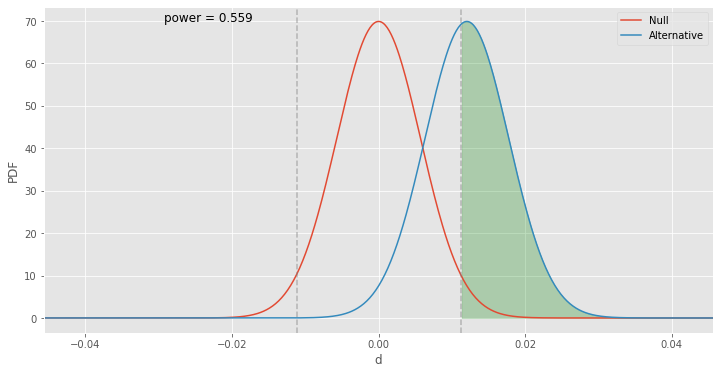

In [107]:
abplot(N_control, N_exposed, bcr, d_hat, show_power=True)

The opposite area under the alternative curve is the probability that we accept the null hypothesis and reject the
alternative hypothesis (false negative). This is referred to as beta in A/B testing. 

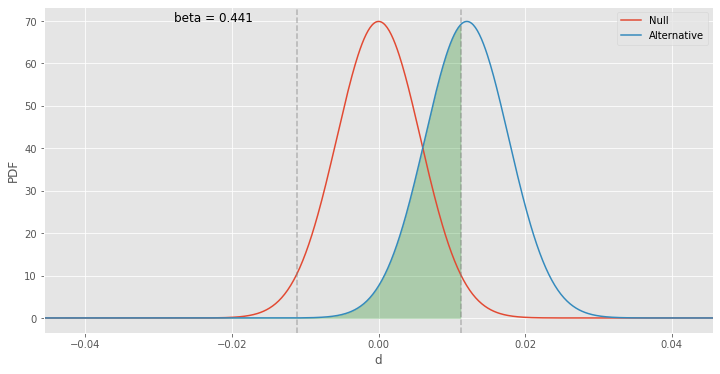

In [108]:
abplot(N_control, N_exposed, bcr, d_hat, show_beta=True)

The gray dashed line that divides the area under the alternative curve into two also directly segments the area associated 
with the significance level, denoted by apha.

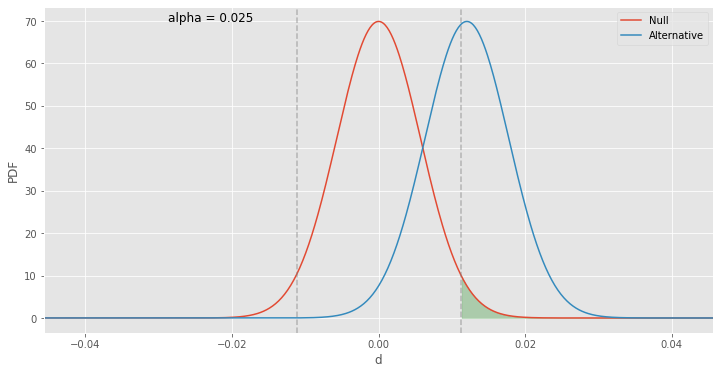

In [110]:
abplot(N_control, N_exposed, bcr, d_hat, show_alpha=True)

In [ ]:
with p-value = 0.05 and alpha=0.025 we can conclude that the test is statistically significant, its indicates strong 
evidence against the null hypothesis. we can reject the null hypothesis. 

# Z_test plots

A z-test is a statistical test to determine whether two population means are different when the variances are known and 
the sample size is large. for our cas we need to compare the means for exposed and control group.

In [111]:
def zplot(area=0.95, two_tailed=True, align_right=False):
    """Plots a z distribution with common annotations
    Example:
        zplot(area=0.95)
        zplot(area=0.80, two_tailed=False, align_right=True)
    Parameters:
        area (float): The area under the standard normal distribution curve.
        align (str): The area under the curve can be aligned to the center
            (default) or to the left.
    Returns:
        None: A plot of the normal distribution with annotations showing the
        area under the curve and the boundaries of the area.
    """
    # create plot object
    fig = plt.figure(figsize=(12, 6))
    ax = fig.subplots()
    # create normal distribution
    norm = scs.norm()
    # create data points to plot
    x = np.linspace(-5, 5, 1000)
    y = norm.pdf(x)

    ax.plot(x, y)

    # code to fill areas
    # for two-tailed tests
    if two_tailed:
        left = norm.ppf(0.5 - area / 2)
        right = norm.ppf(0.5 + area / 2)
        ax.vlines(right, 0, norm.pdf(right), color='grey', linestyle='--')
        ax.vlines(left, 0, norm.pdf(left), color='grey', linestyle='--')

        ax.fill_between(x, 0, y, color='grey', alpha='0.25',
                        where=(x > left) & (x < right))
        plt.xlabel('z')
        plt.ylabel('PDF')
        plt.text(left, norm.pdf(left), "z = {0:.3f}".format(left), fontsize=12,
                 rotation=90, va="bottom", ha="right")
        plt.text(right, norm.pdf(right), "z = {0:.3f}".format(right),
                 fontsize=12, rotation=90, va="bottom", ha="left")
    # for one-tailed tests
    else:
        # align the area to the right
        if align_right:
            left = norm.ppf(1-area)
            ax.vlines(left, 0, norm.pdf(left), color='grey', linestyle='--')
            ax.fill_between(x, 0, y, color='grey', alpha='0.25',
                            where=x > left)
            plt.text(left, norm.pdf(left), "z = {0:.3f}".format(left),
                     fontsize=12, rotation=90, va="bottom", ha="right")
        # align the area to the left
        else:
            right = norm.ppf(area)
            ax.vlines(right, 0, norm.pdf(right), color='grey', linestyle='--')
            ax.fill_between(x, 0, y, color='grey', alpha='0.25',
                            where=x < right)
            plt.text(right, norm.pdf(right), "z = {0:.3f}".format(right),
                     fontsize=12, rotation=90, va="bottom", ha="left")

    # annotate the shaded area
    plt.text(0, 0.1, "shaded area = {0:.3f}".format(area), fontsize=12,
             ha='center')
    # axis labels
    plt.xlabel('z')
    plt.ylabel('PDF')

    plt.show()



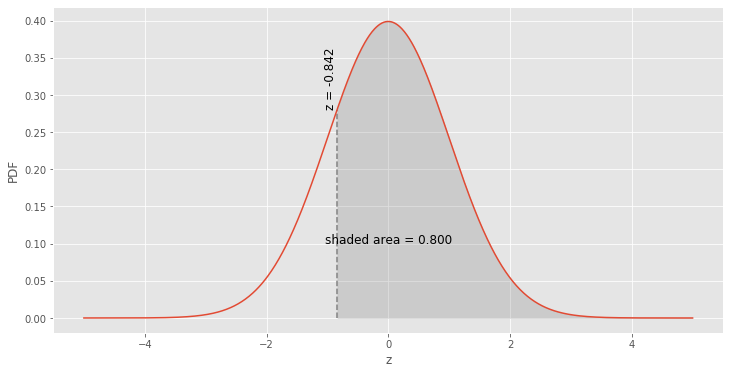

In [112]:
zplot(area=0.80, two_tailed=False, align_right=True)

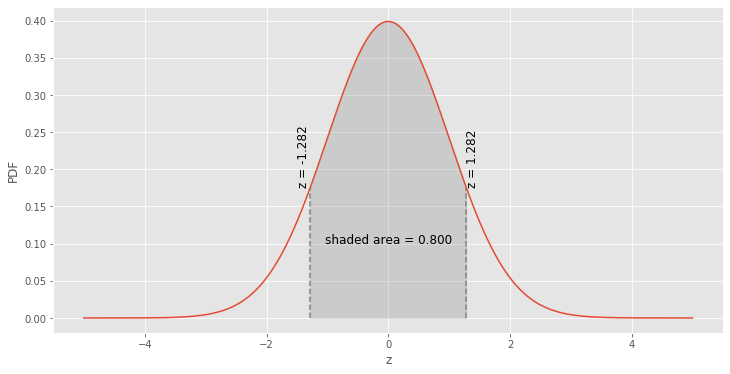

In [113]:
zplot(area=0.80, two_tailed=True)

# Minimum sample size calculation

Useful to know it,  because it is directly related to how quickly you can complete your experiments and deliver 
statistically significant results.

In [114]:
def min_sample_size(bcr, mde, power=0.8, sig_level=0.05):
    """Returns the minimum sample size to set up a split test
    Arguments:
        bcr (float): probability of success for control, sometimes
        referred to as baseline conversion rate
        mde (float): minimum change in measurement between control
        group and test group if alternative hypothesis is true, sometimes
        referred to as minimum detectable effect
        power (float): probability of rejecting the null hypothesis when the
        null hypothesis is false, typically 0.8
        sig_level (float): significance level often denoted as alpha,
        typically 0.05
    Returns:
        min_N: minimum sample size (float)
    References:
        Stanford lecture on sample sizes
        http://statweb.stanford.edu/~susan/courses/s141/hopower.pdf
    """
    # standard normal distribution to determine z-values
    standard_norm = scs.norm(0, 1)

    # find Z_beta from desired power
    Z_beta = standard_norm.ppf(power)

    # find Z_alpha
    Z_alpha = standard_norm.ppf(1-sig_level/2)

    # average of probabilities from both groups
    pooled_prob = (bcr + bcr+mde) / 2

    min_N = (2 * pooled_prob * (1 - pooled_prob) * (Z_beta + Z_alpha)**2
             / mde**2)

    return min_N



In [115]:
min_sample_size(bcr=0.10, mde=0.02)

3842.026629963879

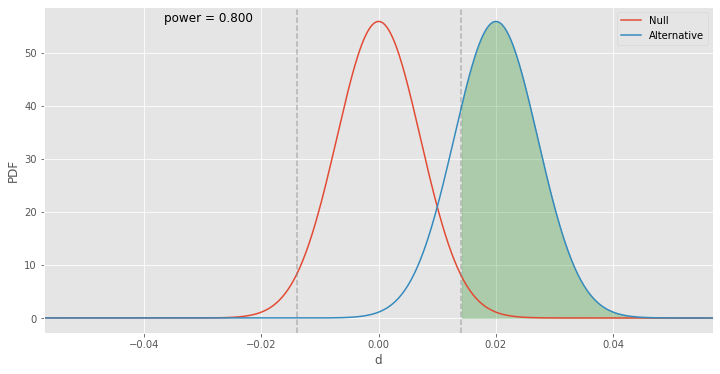

In [116]:
abplot(3843, 3843, 0.10, 0.02, show_power=True)

Double click the following cell to get sample conditional SPRT code

In [33]:
#@title
#REFERENCE
# A Conditional Sequential Test for the Equality of Two Binomial Proportions
# William Q. Meeker, Jr
# Journal of the Royal Statistical Society. Series C (Applied Statistics)
# Vol. 30, No. 2 (1981), pp. 109-115
def ConditionalSPRT(self,x,y,t1,alpha=0.05,beta=0.10,stop=None):
        if t1<=1:
            printLog('warning',"Odd ratio should exceed 1.")
        if (alpha >0.5) | (beta >0.5):
            printLog('warning',"Unrealistic values of alpha or beta were passed."
                     +" You should have good reason to use large alpha & beta values")
        if stop!=None:
            stop=math.floor(n0)

        def comb(n, k):
            return factorial(n) // factorial(k) // factorial(n - k)
        
        def lchoose(b, j):
            a=[]
            if (type(j) is list) | (isinstance(j,np.ndarray)==True):
                if len(j)<2:
                    j=j[0]
            if (type(j) is list) | (isinstance(j,np.ndarray)==True):
                for k in j:
                    n=b
                    if (0 <= k) & (k<= n):
                        a.append(math.log(comb(n,k)))
                    else:
                        a.append(0)
            else:
                n=b
                k=j
                if (0 <= k) & (k<= n):
                    a.append(math.log(comb(n,k)))
                else:
                    a.append(0)

            return np.array(a)

        def g(x,r,n,t1,t0=1):
            return -math.log(h(x,r,n,t1))+math.log(h(x,r,n,t0))

        def h(x,r,n,t=1):
            return f(r,n,t,offset=ftermlog(x,r,n,t))

        def f(r,n,t,offset=0):
            upper=max(0,r-n)
            lower=min(n,r)
            rng=list(range(upper,lower+1))
            return np.sum(fterm(rng,r,n,t,offset))

        def fterm(j,r,n,t,offset=0):
            ftlog=ftermlog(j,r,n,t,offset)
            return np.array([math.exp(ex) for ex in ftlog])

        def ftermlog(j,r,n,t,offset=0):
            xx=r-j
            lch=lchoose(n,j)
            lchdiff=lchoose(n,xx)
            lg=np.array(j)*math.log(t)
            lgsum=lch+lchdiff
            lgsum2=lgsum+lg
            lgdiff=lgsum2-offset

            return lgdiff

        def logf(r,n,t,offset=0):

            z=f(r,n,t,offset)
            if z>0:
                return math.log(z)
            else:
                return np.nan

        def clowerUpper(r,n,t1c,t0=1,alpha=0.05,beta=0.10):
            offset=ftermlog(math.ceil(r/2),r,n,t1c)
            z=logf(r,n,t1c,logf(r,n,t0,offset)+offset)
            a=-math.log(alpha/(1-beta))
            b=math.log(beta/(1-alpha))
            lower=b
            upper=1+a
            return (np.array([lower,upper])+z)/math.log(t1c/t0)
            
        l=math.log(beta/(1-alpha))
        u=-math.log(alpha/(1-beta))
        sample_size=min(len(x),len(y))
        n=np.array(range(1,sample_size+1))

        if stop!=None:
            n=np.array([z for z in n if z<=stop])
        x1=np.cumsum(x[n-1])
        r=x1+np.cumsum(y[n-1])
        stats=np.array(list(map(g,x1, r, n, [t1]*len(x1)))) #recurcively calls g

        clu=list(map(clowerUpper,r,n,[t1]*len(r),[1]*len(r),[alpha]*len(r), [beta]*len(r)))
        limits=[]
        for v in clu:
            inArray=[]
            for vin in v:
                inArray.append(math.floor(vin))
            limits.append(np.array(inArray))
        limits=np.array(limits)

        k=np.where((stats>=u) | (stats<=l))
        cvalues=stats[k]
        if cvalues.shape[0]<1:
            k= np.nan
            outcome='Unable to conclude.Needs more sample.'
        else:
            k=np.min(k)
            if stats[k]>=u:
                outcome=f'Exposed group produced a statistically significant increase.'
            else:
                outcome='Their is no statistically significant difference between two test groups'
        if (stop!=None) & (k==np.nan):
            c1=clowerUpper(r,stop,t1,alpha,beta)
            c1=math.floor(np.mean(c1)-0.5)
            if x1[n0]<=c1:
                truncate_decision='h0'
                outcome='Maximum Limit Decision. The aproximate decision point shows their is no statistically significant difference between two test groups'
            else:
                truncate_decision='h1'
                outcome=f'Maximum Limit Decision. The aproximate decision point shows exposed group produced a statistically significant increase.'
            truncated=stop
        else:
            truncate_decision='Non'
            truncated=np.nan
        return (outcome,n, k,l,u,truncated,truncate_decision,x1,r,stats,limits)

##### Use the next class structure to complete your sequential testing

In [ ]:
## your code here. include other necessary functions as you want.
class SequentialTest:
  def __init__(self,exposed,control,...):
    '''
    initialise startup variables
    '''
  
  def stoppingRule(self, ...):
    '''
    This function should take current observation and return statistical decision made. 
    Consider truncate rule for longer tests
    '''

  def computeBoundaries(self,):
    '''
    This function shoud compute boundaries 
    '''

  def plotTest(self,):
    '''
    showing the cumulative statistical test (e.g., log probability ratio) and the uper and lower limits.
    '''

  def plotBoundaries(self,):
    '''cumulative sums of exposed successes, bounded by the critical limits.
    '''


In [ ]:
def transform_data(df):
  '''
  segment data into exposed and control groups
  consider that SmartAd runs the experment hourly, group data into hours. 
      Hint: create new column to hold date+hour and use df.column.map(lambda x:  pd.Timestamp(x,tz=None).strftime('%Y-%m-%d:%H'))
  create two dataframes with bernouli series 1 for posetive(yes) and 0 for negative(no)
    Hint: Given engagement(sum of yes and no until current observation as an array) and success (yes countas an array), the method generates random binomial distribution
        #Example
           engagement = np.array([5, 3, 3])
           yes = np.array([2, 0, 3])       
         Output is "[1] 1 0 1 0 0 0 0 0 1 1 1", showing a binary array of 5+3+3 values
         of which 2 of the first 5 are ones, 0 of the next 3 are ones, and all 3 of
         the last 3 are ones where position the ones is randomly distributed within each group.
  '''
  return exposed,control

def plotDataSummary(exposed, control):
  'This function plots cummulated success'

def pretyPrintTestResult(self, test):
  '''This function print final test result. Json format is recommended. For example
  {
    "name": "",
    "engagementCountControl": ,
    "engagementCountExposed": ,
    "positiveCountControl": ,
    "positiveCountExposed": ,
    "ControlSuccessProbability": ,
    "ExposedSuccessProbability": ,
    "basePositiveRate": ,
    "significanceSign": ".",
    "lift": ,
    "oddRatio": ,
    "exactSuccessOddRate":,
    "confidenceIntervalLevel": ,
    "alpha": ,
    "beta": ,
    "power": ,
    "criticalValue": ,
    "lower critical(a)": 
    "upper critical(b)": ,
    "TotalObservation": 
  }'''

In [ ]:

######################################
'Define statistical parameters such as alpha, beta, sample size if evan approach is used, odd ratio for SPRT'
alpha=
beta=
#other variables here
'Compute statistical lower and upper decision points such as a and b'
a=
b=
#other variables here

##data processing here
exposed,control=transform_data(data)
##plot data summary
plotDataSummary(exposed,control)

'Perform test. Loop over each of data entry and perform test. Accumulate result into dataframe and print out test journey'
test=SequentialTest(...)

'Print test result.'
pretyPrintTestResult(resultObject)